In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
fgraph=data.select_dtypes(include=['float'])

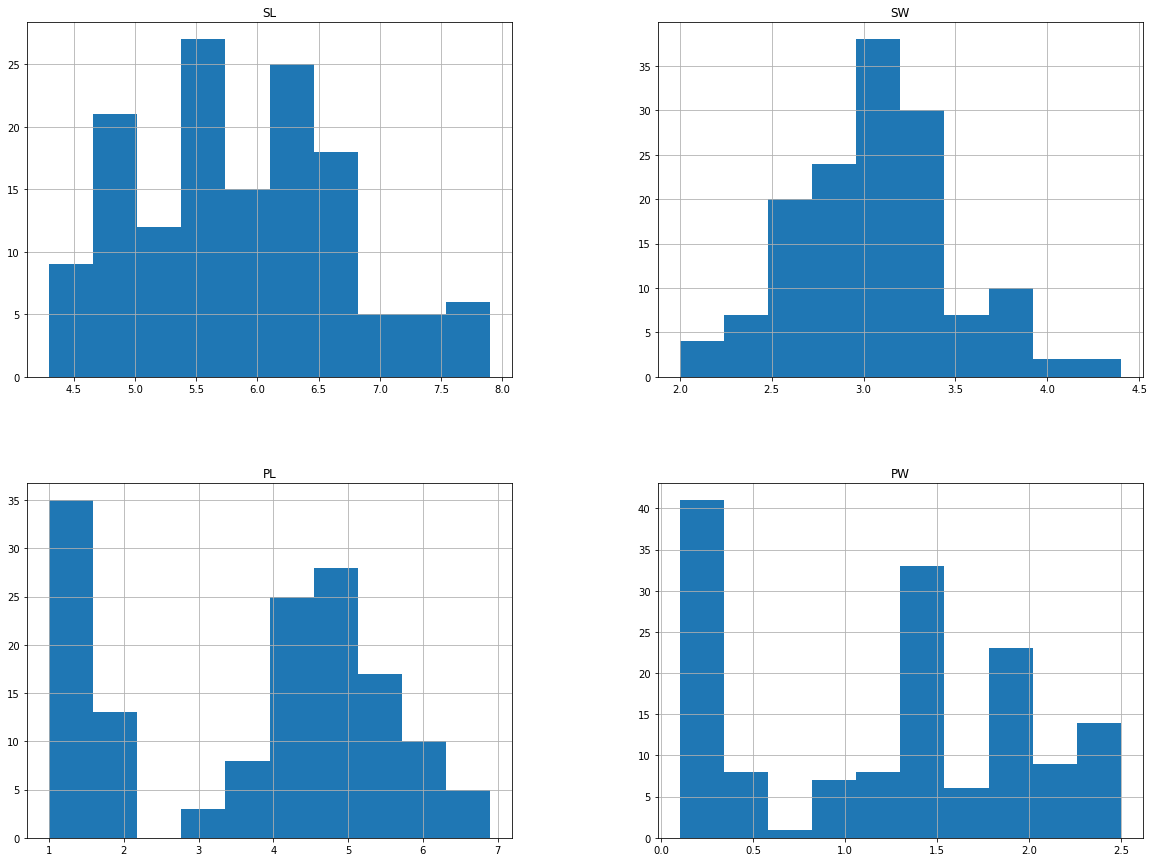

In [7]:
fgraph.hist(figsize=(20,15))
plt.show()

In [8]:
for i in ['SL', 'SW','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [9]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
#Label encoding on Classification column
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [12]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [13]:
#spliting into x and y
y=data['Classification']
x=data.drop('Classification',axis=1)

In [14]:
#appling MinMax scaling on X
from sklearn.preprocessing import MinMaxScaler 

In [15]:
minmax=MinMaxScaler(feature_range=(0,1))
x1=minmax.fit_transform(x)

In [16]:
x.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [17]:
x1=pd.DataFrame(x1,columns=['SL', 'SW', 'PL', 'PW'])

In [18]:
x1.head()

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.432207,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=42)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log=LogisticRegression()
model=log.fit(x_train,y_train) #creating model

In [23]:
y_pred=model.predict(x_test)

In [24]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [25]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [26]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [27]:
print(accuracy_score(y_test,y_pred))

1.0


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors=k)
    model1=knn.fit(x_train,y_train)
    y_pred_knn=model1.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [30]:
metric_k

[0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

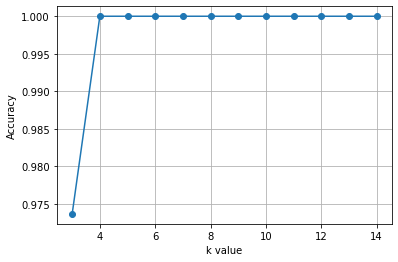

In [31]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [32]:
knn= KNeighborsClassifier(n_neighbors=4)
model1=knn.fit(x_train,y_train)
y_pred_knn=model1.predict(x_test)

In [33]:
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


# SVM

In [34]:
from sklearn.svm import SVC

Kernel=rbf

In [35]:
svm_clf=SVC(kernel='rbf')

In [36]:
svm_model=svm_clf.fit(x_train,y_train)

In [37]:
y_pred1=svm_clf.predict(x_test)

In [38]:
confusion_matrix(y_test,y_pred1)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred1)

0.9736842105263158

Kernel = Poly

In [40]:
svm_cl=SVC(kernel='poly')
svm_model1=svm_cl.fit(x_train,y_train)
y_pred=svm_cl.predict(x_test)

In [41]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred)

0.9473684210526315

Kernel = Linear

In [43]:
svm_c=SVC(kernel='linear')
svm_model2=svm_c.fit(x_train,y_train)
y_pred=svm_c.predict(x_test)

In [44]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [45]:
accuracy_score(y_test,y_pred)

1.0

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_predd=dt_clf.predict(x_test)

In [48]:
confusion_matrix(y_test,y_predd)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [49]:
accuracy_score(y_test,y_predd)

1.0

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_predr=rf_clf.predict(x_test)

In [53]:
confusion_matrix(y_test,y_predr)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [54]:
accuracy_score(y_test,y_predr)

1.0

Logistic Regression = 100%
kNN                 = 100%
SVM (rbf)           = 97%
SVM (poly)          = 94%
SVM (linear)        = 100%
Decision Tree       = 100%
Random Forest       = 100%

I got these percentages of accuracies. Logistic Regression,Knn,SVM (linear kernel),Decision tree and Random forest classifications gives the best results.